In [1]:
import pandas as pd
import nltk 
import numpy as np
import re
from nltk.stem import wordnet # to perform lemmitization
from sklearn.feature_extraction.text import CountVectorizer # to perform bow
from sklearn.feature_extraction.text import TfidfVectorizer # to perform tfidf
from nltk import pos_tag # for parts of speech
from sklearn.metrics import pairwise_distances # to perfrom cosine similarity
from nltk import word_tokenize # to create tokens
from nltk.corpus import stopwords # for stop words
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C://Users//Roshan//Downloads//Email_templates.csv')
df.head(20)

,Template,Title,Category
0,"<p>Hi {name},</p> <p>My name is {name} with {Y...",{Company Name} + {Your Company},Cold Email Templates
1,"<p>Hi Mike, <br/><br/>My name is Nick and I’m ...",{Company Name} + Smart Host,Cold Email Templates
2,"<p>{name}, <br/><br/>I'd like to discuss your ...",How to Export [company] Prospects from profess...,Cold Email Templates
3,"<p>{name}, <br/><br/>I am doing some research ...",Looking for best [insert job area where you’d ...,Cold Email Templates
4,"<p>{name}, <br/><br/>I’m hoping you can help m...",Where shall I start?,Cold Email Templates
5,"<p>Hi {name},</p> <p>My name is {name} with {Y...",[theircompanyname] and [yourcompanyname],Cold Email Templates
6,<p>{name} <br/><br/>We have a service that wil...,Appropriate person,Cold Email Templates
7,<p>I was wondering if you were looking for mor...,Looking for an Accountant,Cold Email Templates
8,"<p>Hello {name}, <br/><br/>I have an idea that...",10 x {company} [result] in ten minutes?,Cold Email Templates
9,"<p>Hi {name}, <br/><br/>This is SDR with RJMet...",Appropriate Person?,Cold Email Templates


In [3]:
import re

CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [4]:
def tags(s):
    s= str(s)
    s=s.replace("<p>","")
    s=s.replace("</p>","")
    s=s.replace("<br/>","")
    s=s.replace("</br>","")
    pattern = r"<p.{0,}>"
    s=re.sub(pattern,"",s)
    return s

In [5]:
import re

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"",text)

def remove_html(text):
    html= re.compile(r"<.*?>")
    return html.sub(r"",text)

In [6]:
df

,Template,Title,Category
0,"<p>Hi {name},</p> <p>My name is {name} with {Y...",{Company Name} + {Your Company},Cold Email Templates
1,"<p>Hi Mike, <br/><br/>My name is Nick and I’m ...",{Company Name} + Smart Host,Cold Email Templates
2,"<p>{name}, <br/><br/>I'd like to discuss your ...",How to Export [company] Prospects from profess...,Cold Email Templates
3,"<p>{name}, <br/><br/>I am doing some research ...",Looking for best [insert job area where you’d ...,Cold Email Templates
4,"<p>{name}, <br/><br/>I’m hoping you can help m...",Where shall I start?,Cold Email Templates
...,...,...,...
71,"<p>I noticed you ... (<a href=""http://www.slid...",NaN,Opening Lines For Sales Emails
72,"<p>Hello <em>{name}</em>, </p> <p>How would y...",NaN,Sales Proposal Email Templates
73,"<p>Hi {name},</p> <p>Thanks so much for being ...",NaN,Discount Offer Email Templates
74,"<p>Hello {name},</p> <p>I took a quick look at...",NaN,Persuasive Sales Email Templates


In [7]:
df["new_template"]= df.Template.apply(tags)

In [8]:
new_template=df["new_template"]
new_template=new_template.to_frame()

In [9]:
df.head(20)

,Template,Title,Category,new_template
0,"<p>Hi {name},</p> <p>My name is {name} with {Y...",{Company Name} + {Your Company},Cold Email Templates,"Hi {name}, My name is {name} with {Your Compan..."
1,"<p>Hi Mike, <br/><br/>My name is Nick and I’m ...",{Company Name} + Smart Host,Cold Email Templates,"Hi Mike, My name is Nick and I’m a co-founder ..."
2,"<p>{name}, <br/><br/>I'd like to discuss your ...",How to Export [company] Prospects from profess...,Cold Email Templates,"{name}, I'd like to discuss your lead gen effo..."
3,"<p>{name}, <br/><br/>I am doing some research ...",Looking for best [insert job area where you’d ...,Cold Email Templates,"{name}, I am doing some research on your compa..."
4,"<p>{name}, <br/><br/>I’m hoping you can help m...",Where shall I start?,Cold Email Templates,"{name}, I’m hoping you can help me, who handle..."
5,"<p>Hi {name},</p> <p>My name is {name} with {Y...",[theircompanyname] and [yourcompanyname],Cold Email Templates,"Hi {name}, My name is {name} with {Your Compan..."
6,<p>{name} <br/><br/>We have a service that wil...,Appropriate person,Cold Email Templates,{name} We have a service that will help you [i...
7,<p>I was wondering if you were looking for mor...,Looking for an Accountant,Cold Email Templates,I was wondering if you were looking for more b...
8,"<p>Hello {name}, <br/><br/>I have an idea that...",10 x {company} [result] in ten minutes?,Cold Email Templates,"Hello {name}, I have an idea that I can explai..."
9,"<p>Hi {name}, <br/><br/>This is SDR with RJMet...",Appropriate Person?,Cold Email Templates,"Hi {name}, This is SDR with RJMetrics. Wanted ..."


In [10]:
new_template.head(76)

,new_template
0,"Hi {name}, My name is {name} with {Your Compan..."
1,"Hi Mike, My name is Nick and I’m a co-founder ..."
2,"{name}, I'd like to discuss your lead gen effo..."
3,"{name}, I am doing some research on your compa..."
4,"{name}, I’m hoping you can help me, who handle..."
...,...
71,"I noticed you ... (<a href=""http://www.slidesh..."
72,"Hello <em>{name}</em>, How would you like to..."
73,"Hi {name}, Thanks so much for being a loyal {c..."
74,"Hello {name}, I took a quick look at your webs..."


In [11]:
dff=new_template.head(76)

In [12]:
dff

,new_template
0,"Hi {name}, My name is {name} with {Your Compan..."
1,"Hi Mike, My name is Nick and I’m a co-founder ..."
2,"{name}, I'd like to discuss your lead gen effo..."
3,"{name}, I am doing some research on your compa..."
4,"{name}, I’m hoping you can help me, who handle..."
...,...
71,"I noticed you ... (<a href=""http://www.slidesh..."
72,"Hello <em>{name}</em>, How would you like to..."
73,"Hi {name}, Thanks so much for being a loyal {c..."
74,"Hello {name}, I took a quick look at your webs..."


In [13]:
dff.count()

new_template    76
dtype: int64

In [14]:
dff.ffill(axis = 0,inplace=True) # fills the null value with the previous value.
dff

,new_template
0,"Hi {name}, My name is {name} with {Your Compan..."
1,"Hi Mike, My name is Nick and I’m a co-founder ..."
2,"{name}, I'd like to discuss your lead gen effo..."
3,"{name}, I am doing some research on your compa..."
4,"{name}, I’m hoping you can help me, who handle..."
...,...
71,"I noticed you ... (<a href=""http://www.slidesh..."
72,"Hello <em>{name}</em>, How would you like to..."
73,"Hi {name}, Thanks so much for being a loyal {c..."
74,"Hello {name}, I took a quick look at your webs..."


In [15]:
dff.count()

new_template    76
dtype: int64

In [16]:
dff.describe()

,new_template
count,76
unique,72
top,nan
freq,4


In [17]:
df1=dff.head(10)

In [18]:
def step1(x):
    for i in x:
        a=str(i).lower()
        p=re.sub(r'[^a-z0-9]',' ',a)
        print(p)

In [19]:
step1(df1['new_template'])

hi  name   my name is  name  with  your company   we help  specific company type  with  one liner   i wanted to learn how you handle  thing your company handles  at  company name  and show you what we re working on  are you available for a brief call at  time options  
hi mike  my name is nick and i m a co founder at smart host  we help property managers optimize their pricing on marketplaces like homeaway  vrbo  and flipkey  i wanted to learn how you currently handle price optimization and show you what we re working on  are you available for a quick call tomorrow afternoon 
 name   i d like to discuss your lead gen efforts  we re helping other  industry  companies collect their prospects straight from professional social networks and import them directly into their crm  adding phone numbers and email addresses   quick question  can you put me in touch with whoever is responsible for new prospecting and revenue  generating tools at  company   hi  name    myname  from  mycompany  here 

# cleaning the data

In [20]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [21]:
df['new_template'] = df.new_template.apply(clean)
df.new_template

0     hi name my name is name with your company we h...
1     hi mike my name is nick and im a cofounder at ...
2     name id like to discuss your lead gen efforts ...
3     name i am doing some research on your company ...
4     name im hoping you can help me who handles the...
                            ...                        
71    i noticed you  a hrefhttpwwwslidesharenethubsp...
72    hello  emnameem  how would you like to cut you...
73    hi name thanks so much for being a loyal compa...
74    hello name i took a quick look at your website...
75    hi name your websites design is absolutely bri...
Name: new_template, Length: 76, dtype: object

In [22]:
dff.head()

,new_template
0,"Hi {name}, My name is {name} with {Your Compan..."
1,"Hi Mike, My name is Nick and I’m a co-founder ..."
2,"{name}, I'd like to discuss your lead gen effo..."
3,"{name}, I am doing some research on your compa..."
4,"{name}, I’m hoping you can help me, who handle..."


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['new_template'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,to,282
1,you,243
2,the,174
3,and,156
4,your,131
...,...,...
1555,numerous,1
1556,driver,1
1557,resulting,1
1558,challenged,1


In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
text = ' '.join(df['new_template'])
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)
print(fdist)


<FreqDist with 1570 samples and 7443 outcomes>


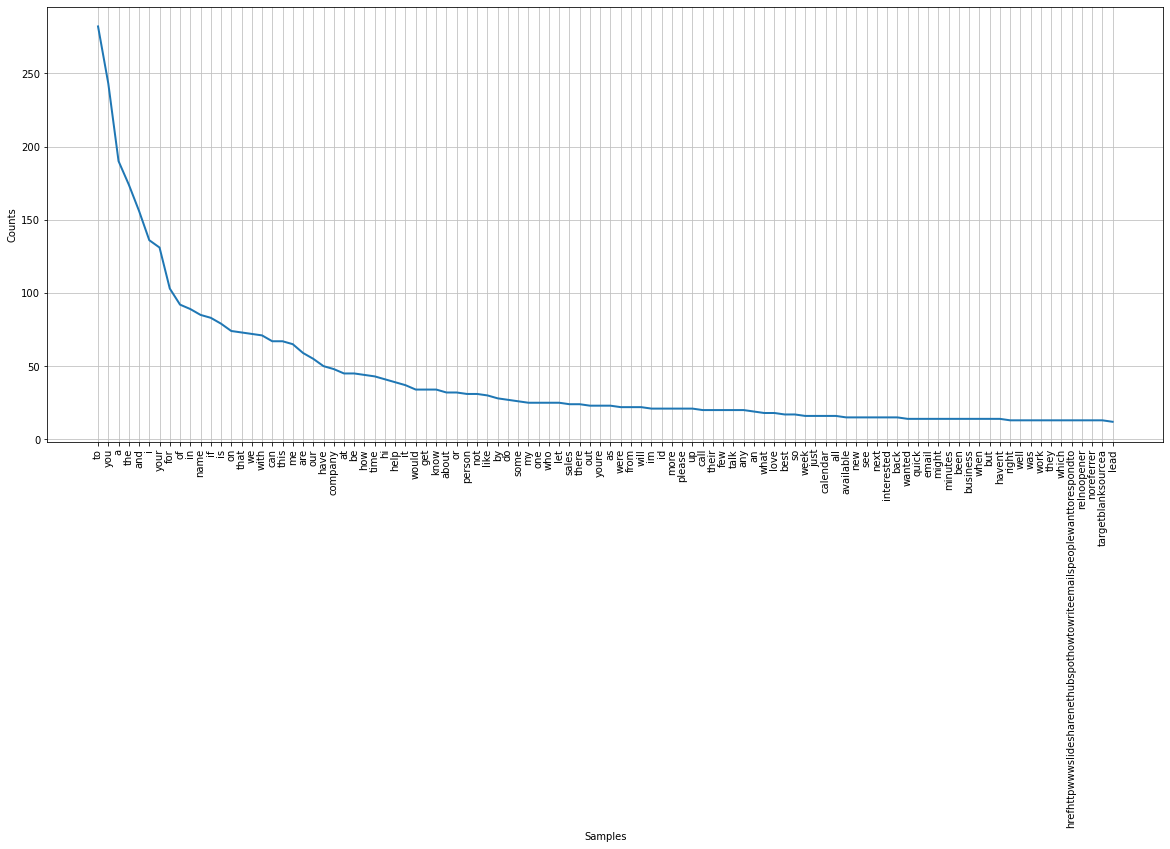

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

fdist.plot(100,cumulative=False)
plt.show()

<AxesSubplot:title={'center':'Stopwords in mails'}, xlabel='word'>

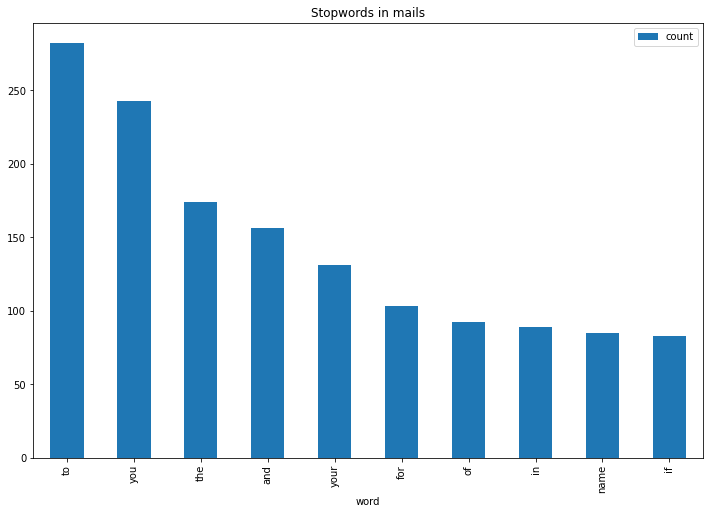

In [27]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Stopwords in mails')

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# removal of stop words

In [29]:
stop = stopwords.words('english')
new_words=('dear','name', 'work', 'email','please','would','time','company','sincerely','hi')
for i in new_words:
    stop.append(i)
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
dff['CONTEXT_OF_SAMPLE_MAIL_without_stopwords'] = df['new_template'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [31]:
dff

,new_template,CONTEXT_OF_SAMPLE_MAIL_without_stopwords
0,"Hi {name}, My name is {name} with {Your Compan...",help specific type one liner wanted learn hand...
1,"Hi Mike, My name is Nick and I’m a co-founder ...",mike nick im cofounder smart host help propert...
2,"{name}, I'd like to discuss your lead gen effo...",id like discuss lead gen efforts helping compa...
3,"{name}, I am doing some research on your compa...",research determine need could help pointing be...
4,"{name}, I’m hoping you can help me, who handle...",im hoping help handles decisions might get touch
...,...,...
71,"I noticed you ... (<a href=""http://www.slidesh...",noticed hrefhttpwwwslidesharenethubspothowtowr...
72,"Hello <em>{name}</em>, How would you like to...",hello emnameem like cut printing costs percent...
73,"Hi {name}, Thanks so much for being a loyal {c...",thanks much loyal years show appreciation plea...
74,"Hello {name}, I took a quick look at your webs...",hello took quick look website immediately thor...


In [32]:
book = [x.strip() for x in dff.new_template] # remove both the leading and the trailing characters
book = [x for x in book if x]

In [33]:
def text_normalization(text):
    text=str(text).lower() # text to lower case
    spl_char_text=re.sub(r'[^ a-z]','',text) # removing special characters
    tokens=nltk.word_tokenize(spl_char_text) # word tokenizing
    lema=wordnet.WordNetLemmatizer() # intializing lemmatization
    tags_list=pos_tag(tokens,tagset=None) # parts of speech
    lema_words=[]   # empty list 
    for token,pos_token in tags_list:
        if pos_token.startswith('V'):  # Verb
            pos_val='v'
        elif pos_token.startswith('J'): # Adjective
            pos_val='a'
        elif pos_token.startswith('R'): # Adverb
            pos_val='r'
        else:
            pos_val='n' # Noun
        lema_token=lema.lemmatize(token,pos_val) # performing lemmatization
        lema_words.append(lema_token) # appending the lemmatized token into a list
    
    return " ".join(lema_words)

In [34]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
text_normalization('hi mike  my name is nick and i m a co founder at smart host  we help property managers optimize their pricing on marketplaces like homeaway  vrbo  and flipkey  i wanted to learn how you currently handle price optimization and show you what we re working on  are you available for a quick call tomorrow afternoon name   i d like to discuss your lead gen efforts  we re helping other  industry  companies collect their prospects straight from professional social networksand Import them directly into their crm  adding phone numbers And email addresses   quick question  can you put me In touch With whoever Is responsible For new prospecting And revenue  generating tools at  company   hi  name    myname  From  mycompany  here  companies make more sales With consistent marketing   mycompany  can put proven sales tools into the hands of everyone who sells your product  If that sound useful  i can explain how it works  hi  name   i m trying to figure out who Is In charge of  leading general statement  there at  company   would you mind pointing me towards the right person please  And the best way i might get In touch With them  hello  name   what would it mean to your top line revenue  you saw a   increase In contact rates    improvement In closes And   increase In quota hitting sales reps  let s find a few minutes to talk about how insidesales com Is providing these results to our clients  i m available tomorrow  insert 2 times you re available   can we sync up  hi  name   i hope this note finds you well  i ve been working For a company called  my company  that specializes In x  y And z  In thinking about your role at  company   i thought there might be a good fit For your group  our  product name  has garnered a lot of attention In the marketplace And i think it s something that your organization might see immediate value In  can you Help me get In contact With the right decision maker')

'hi mike my name be nick and i m a co founder at smart host we help property manager optimize their pricing on marketplace like homeaway vrbo and flipkey i want to learn how you currently handle price optimization and show you what we re work on be you available for a quick call tomorrow afternoon name i d like to discuss your lead gen effort we re help other industry company collect their prospect straight from professional social networksand import them directly into their crm add phone number and email address quick question can you put me in touch with whoever be responsible for new prospecting and revenue generating tool at company hi name myname from mycompany here company make more sale with consistent market mycompany can put proven sale tool into the hand of everyone who sell your product if that sound useful i can explain how it work hi name i m try to figure out who be in charge of lead general statement there at company would you mind point me towards the right person pleas

In [37]:
df['lemmatized_text']=dff['CONTEXT_OF_SAMPLE_MAIL_without_stopwords'].apply(text_normalization) # applying the fuction to the dataset to get clean text
df.tail(15)

,Template,Title,Category,new_template,lemmatized_text
61,"<p class=""card-body"">Hi {name}, <br/><br/>I’ve...",Re: [same subject],Sequence Sales Email Templates,hi name ive reached out a few times regarding ...,ive reach time regard sale prospect strategy g...
62,NaN,Revenue Growth,Sequence Sales Email Templates,nan,nan
63,"<p class=""card-body"">{name}, <br/><br/>I wante...",Growth initiatives,Sequence Sales Email Templates,name i wanted to see if you had minutes to co...,want see minute connect weve able generate sol...
64,"<p class=""card-body"">Hi {name}, <br/><br/>We r...",(name},Sequence Sales Email Templates,hi name we recently helped a startup by can ...,recently help startup point person handle discus
65,"<p class=""card-body"">{name}, <br/><br/>One of ...",Scaling customer acquisition,Sequence Sales Email Templates,name one of our clients was able to at half o...,one client able half target cost per acquisiti...
66,"<p class=""card-body"">{name}, <br/><br/>I reach...",Are you ok?,Sequence Sales Email Templates,name i reached out previously regarding what y...,reach previously regard havent heard back yet ...
67,NaN,NaN,Inbound Sales Email Templates,nan,nan
68,"<p>Hi {name},Thank you for signing up to test ...",YES! Millennials can sell.,Inbound Sales Email Templates,hi namethank you for signing up to test drive ...,namethank sign test drive kapost recently read...
69,<p>Hey {name} <br/><br/>Whats going on?I saw t...,{name of downloaded ebook},Inbound Sales Email Templates,hey name whats going oni saw that you download...,hey whats go oni saw download ebook whitepaper...
70,"<p>Ben, loved your tweet yesterday</p> <p>Ben,...",NaN,Best Subject Lines For Sales Emails,ben loved your tweet yesterday ben love what y...,ben love tweet yesterday ben love guy datanyze...


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X1 = cv.fit_transform(df['lemmatized_text'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df1 = pd.DataFrame(words_freq)
wf_df1.columns = ['word', 'count']

wf_df1

,word,count
0,approval,156
1,incredibly,103
2,salesguy,92
3,meanwhile,89
4,register,85
...,...,...
1226,compels,1
1227,relatively,1
1228,simple,1
1229,fix,1


<AxesSubplot:title={'center':'lemmatized text'}, xlabel='word'>

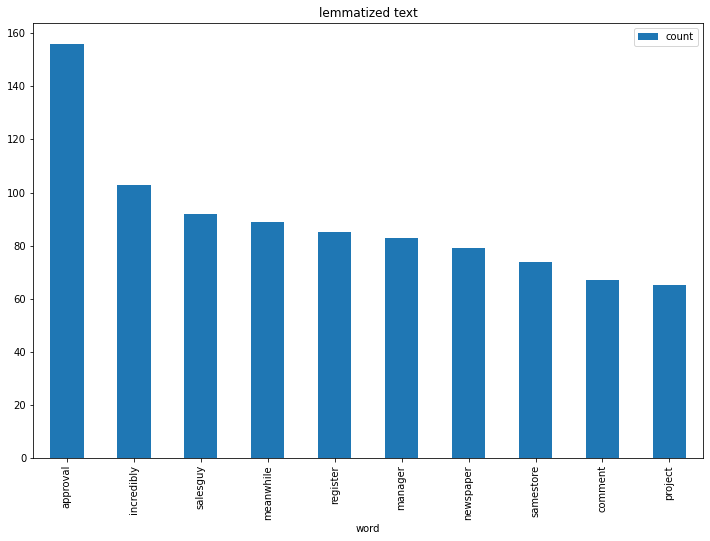

In [39]:
wf_df1[0:10].plot.bar(x='word', figsize=(12,8), title='lemmatized text')

# Frequency of words

In [40]:
freq_Sw = pd.Series(' '.join(df['lemmatized_text']).split()).value_counts()[:50] # for top 20
freq_Sw


help                                                                    48
get                                                                     47
know                                                                    34
let                                                                     33
like                                                                    32
person                                                                  31
look                                                                    29
one                                                                     26
want                                                                    24
sale                                                                    24
call                                                                    24
youre                                                                   23
customer                                                                23
talk                     

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

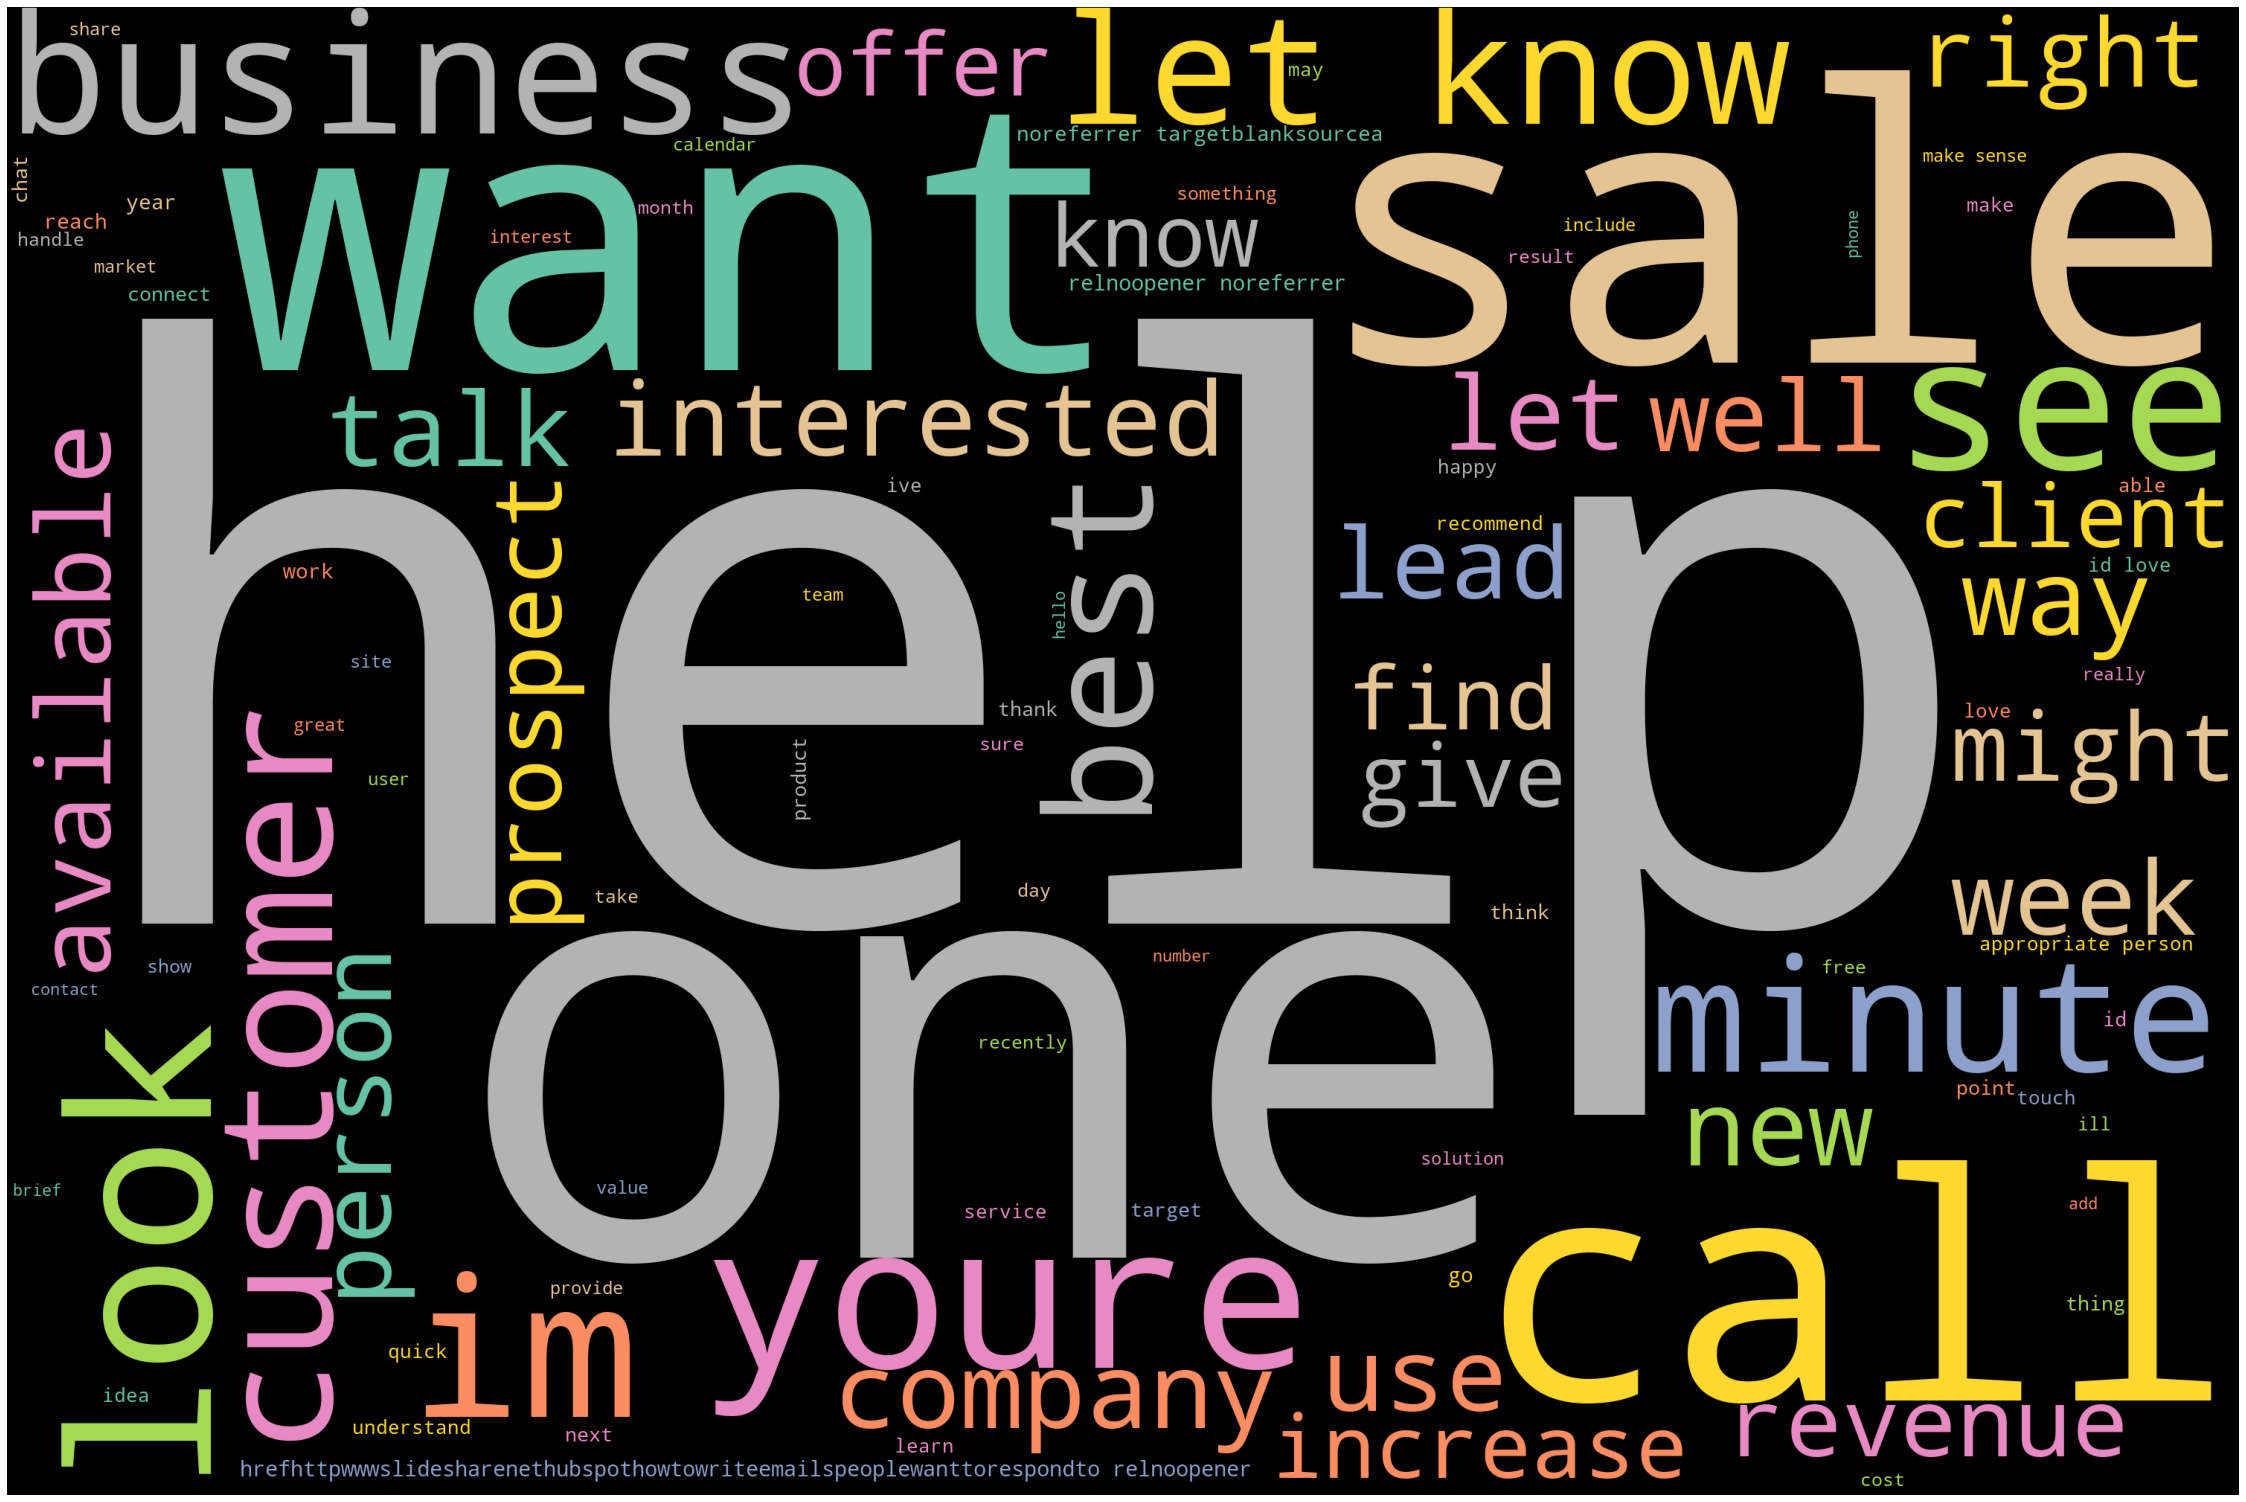

In [42]:
text = df['lemmatized_text'].values 

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(str(text))
plot_cloud(wordcloud)

In [43]:
data = df[["lemmatized_text","Template","Category"]]
data

,lemmatized_text,Template,Category
0,help specific type one liner want learn handle...,"<p>Hi {name},</p> <p>My name is {name} with {Y...",Cold Email Templates
1,mike nick im cofounder smart host help propert...,"<p>Hi Mike, <br/><br/>My name is Nick and I’m ...",Cold Email Templates
2,id like discuss lead gen effort help company c...,"<p>{name}, <br/><br/>I'd like to discuss your ...",Cold Email Templates
3,research determine need could help point best ...,"<p>{name}, <br/><br/>I am doing some research ...",Cold Email Templates
4,im hop help handle decision might get touch,"<p>{name}, <br/><br/>I’m hoping you can help m...",Cold Email Templates
...,...,...,...
71,notice hrefhttpwwwslidesharenethubspothowtowri...,"<p>I noticed you ... (<a href=""http://www.slid...",Opening Lines For Sales Emails
72,hello emnameem like cut printing cost percent ...,"<p>Hello <em>{name}</em>, </p> <p>How would y...",Sales Proposal Email Templates
73,thanks much loyal year show appreciation pleas...,"<p>Hi {name},</p> <p>Thanks so much for being ...",Discount Offer Email Templates
74,hello take quick look website immediately thor...,"<p>Hello {name},</p> <p>I took a quick look at...",Persuasive Sales Email Templates


# named enitity recognition

In [44]:
import spacy
nlp = spacy.load("en_core_web_sm")
text_nlp = nlp(no_punc_text)

In [45]:
ner_tagged = [(word.text, word.ent_type_) for word in text_nlp]
from spacy import displacy

# visualize named entities
displacy.render(text_nlp, style='ent', jupyter=True)

In [46]:
named_entities = []
temp_entity_name = ''
temp_named_entity = None
for term, tag in ner_tagged:
    if tag:
        temp_entity_name = ' '.join([temp_entity_name, term]).strip()
        temp_named_entity = (temp_entity_name, tag)
    else:
        if temp_named_entity:
            named_entities.append(temp_named_entity)
            temp_entity_name = ''
            temp_named_entity = None

In [47]:
print(named_entities)

[('one', 'CARDINAL'), ('tomorrow afternoon', 'TIME'), ('revenue\xad', 'NORP'), ('a few minutes', 'TIME'), ('tomorrow', 'DATE'), ('one', 'CARDINAL'), ('xyz', 'ORG'), ('this week', 'DATE'), ('ps', 'PERSON'), ('monthly', 'DATE'), ('a minute', 'TIME'), ('every day', 'DATE'), ('the next few days', 'DATE'), ('daytoday', 'DATE'), ('each month', 'DATE'), ('one', 'CARDINAL'), ('this week', 'DATE'), ('next week', 'DATE'), ('ps', 'PERSON'), ('first', 'ORDINAL'), ('a minute', 'TIME'), ('yesterday', 'DATE'), ('fda', 'ORG'), ('the next few months', 'DATE'), ('next tuesday', 'DATE'), ('first', 'ORDINAL'), ('the last several years', 'DATE'), ('thursday', 'DATE'), ('a few minutes', 'TIME'), ('xyz', 'ORG'), ('the past year', 'DATE'), ('abc', 'ORG'), ('a minute', 'TIME'), ('recent months', 'DATE'), ('the past year', 'DATE'), ('three', 'CARDINAL'), ('the three months', 'DATE'), ('next thursday', 'DATE'), ('terry fisher', 'PERSON'), ('today', 'DATE'), ('two', 'CARDINAL'), ('yesterday', 'DATE'), ('two', 'CA

In [48]:
from collections import Counter
c = Counter([item[1] for item in named_entities])
c.most_common()

[('DATE', 60),
 ('CARDINAL', 22),
 ('TIME', 9),
 ('PERSON', 7),
 ('ORG', 5),
 ('ORDINAL', 4),
 ('NORP', 3),
 ('MONEY', 1),
 ('PERCENT', 1)]

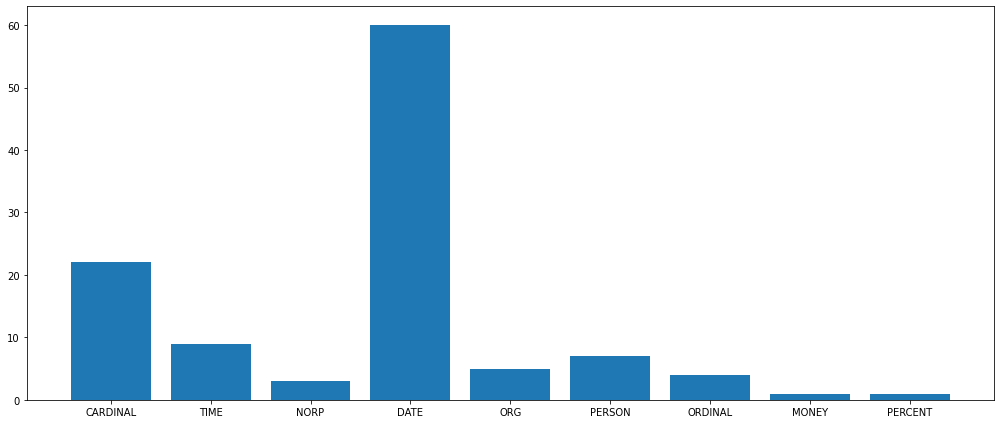

In [49]:
plt.rcParams["figure.figsize"] = [14, 6]
plt.rcParams["figure.autolayout"] = True
plt.bar(c.keys(), c.values())

plt.show()

# part of speech tagging

In [50]:
for token in text_nlp:
    print(token, token.pos_)

hi INTJ
name VERB
my PRON
name NOUN
is AUX
name NOUN
with ADP
your PRON
company NOUN
we PRON
help VERB
specific ADJ
company NOUN
type NOUN
with ADP
one NUM
liner NOUN
i PRON
wanted VERB
to PART
learn VERB
how ADV
you PRON
handle VERB
thing NOUN
your PRON
company NOUN
handles VERB
at ADP
company NOUN
name NOUN
and CCONJ
show VERB
you PRON
what PRON
were AUX
working VERB
on ADP
are AUX
you PRON
available ADJ
for ADP
a DET
brief ADJ
call NOUN
at ADP
time NOUN
options NOUN
hi INTJ
mike PROPN
my PRON
name NOUN
is AUX
nick PROPN
and CCONJ
i PRON
m VERB
a DET
cofounder NOUN
at ADP
smart ADJ
host NOUN
we PRON
help VERB
property NOUN
managers NOUN
optimize VERB
their PRON
pricing NOUN
on ADP
marketplaces NOUN
like ADP
homeaway ADJ
vrbo NOUN
and CCONJ
flipkey NOUN
i PRON
wanted VERB
to PART
learn VERB
how ADV
you PRON
currently ADV
handle VERB
price NOUN
optimization NOUN
and CCONJ
show VERB
you PRON
what PRON
were AUX
working VERB
on ADP
are VERB
you PRON
available ADJ
for ADP
a DET
quick ADJ
c

In [51]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in text_nlp if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])#Filtering for nouns and verbs only

['name', 'name', 'name', 'company', 'help', 'company', 'type', 'liner', 'wanted', 'learn', 'handle', 'thing', 'company', 'handles', 'company', 'name', 'show', 'working', 'call', 'time', 'options', 'name', 'm', 'cofounder', 'host', 'help', 'property', 'managers', 'optimize', 'pricing', 'marketplaces', 'vrbo', 'flipkey', 'wanted', 'learn', 'handle', 'price', 'optimization', 'show', 'working', 'are', 'call', 'tomorrow', 'afternoon', 'name', 'd', 'like', 'discuss', 'lead', 'efforts']


In [52]:
import nltk
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(text_tokens)
pd.DataFrame(pos_tags).T

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,0,1,2,3,4,5,6,7,8,9,...,7433,7434,7435,7436,7437,7438,7439,7440,7441,7442
0,hi,name,my,name,is,name,with,your,company,we,...,available,tomorrow,insert,time,youre,available,can,we,sync,up
1,NN,NN,PRP$,NN,VBZ,JJ,IN,PRP$,NN,PRP,...,JJ,NN,JJ,NN,NN,JJ,MD,PRP,VB,RP


In [53]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = df['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = df['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [54]:
df

,Template,Title,Category,new_template,lemmatized_text,noun_count,verb_count,adj_count,adv_count,pron_count
0,"<p>Hi {name},</p> <p>My name is {name} with {Y...",{Company Name} + {Your Company},Cold Email Templates,hi name my name is name with your company we h...,help specific type one liner want learn handle...,0,0,0,0,0
1,"<p>Hi Mike, <br/><br/>My name is Nick and I’m ...",{Company Name} + Smart Host,Cold Email Templates,hi mike my name is nick and im a cofounder at ...,mike nick im cofounder smart host help propert...,0,0,0,0,0
2,"<p>{name}, <br/><br/>I'd like to discuss your ...",How to Export [company] Prospects from profess...,Cold Email Templates,name id like to discuss your lead gen efforts ...,id like discuss lead gen effort help company c...,0,0,0,0,0
3,"<p>{name}, <br/><br/>I am doing some research ...",Looking for best [insert job area where you’d ...,Cold Email Templates,name i am doing some research on your company ...,research determine need could help point best ...,0,0,0,0,0
4,"<p>{name}, <br/><br/>I’m hoping you can help m...",Where shall I start?,Cold Email Templates,name im hoping you can help me who handles the...,im hop help handle decision might get touch,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71,"<p>I noticed you ... (<a href=""http://www.slid...",NaN,Opening Lines For Sales Emails,i noticed you a hrefhttpwwwslidesharenethubsp...,notice hrefhttpwwwslidesharenethubspothowtowri...,0,0,0,0,0
72,"<p>Hello <em>{name}</em>, </p> <p>How would y...",NaN,Sales Proposal Email Templates,hello emnameem how would you like to cut you...,hello emnameem like cut printing cost percent ...,0,0,0,0,0
73,"<p>Hi {name},</p> <p>Thanks so much for being ...",NaN,Discount Offer Email Templates,hi name thanks so much for being a loyal compa...,thanks much loyal year show appreciation pleas...,0,0,0,0,0
74,"<p>Hello {name},</p> <p>I took a quick look at...",NaN,Persuasive Sales Email Templates,hello name i took a quick look at your website...,hello take quick look website immediately thor...,0,0,0,0,0


# Bigram analysis

In [55]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [56]:
top2_words = get_top_n2_words(df['lemmatized_text'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,let know,24
1,hrefhttpwwwslidesharenethubspothowtowriteemail...,13
2,relnoopener noreferrer,13
3,noreferrer targetblanksourcea,13
4,appropriate person,12


# bigram visualization

[Text(0, 0, 'let know'),
 Text(1, 0, 'hrefhttpwwwslidesharenethubspothowtowriteemailspeoplewanttorespondto relnoopener'),
 Text(2, 0, 'relnoopener noreferrer'),
 Text(3, 0, 'noreferrer targetblanksourcea'),
 Text(4, 0, 'appropriate person'),
 Text(5, 0, 'id love'),
 Text(6, 0, 'make sense'),
 Text(7, 0, 'calendar look'),
 Text(8, 0, 'get touch'),
 Text(9, 0, 'blog post'),
 Text(10, 0, 'best person'),
 Text(11, 0, 'person handle'),
 Text(12, 0, 'person speak'),
 Text(13, 0, 'look like'),
 Text(14, 0, 'customer success'),
 Text(15, 0, 'hear back'),
 Text(16, 0, 'havent respond'),
 Text(17, 0, 'havent heard'),
 Text(18, 0, 'quick call'),
 Text(19, 0, 'id like')]

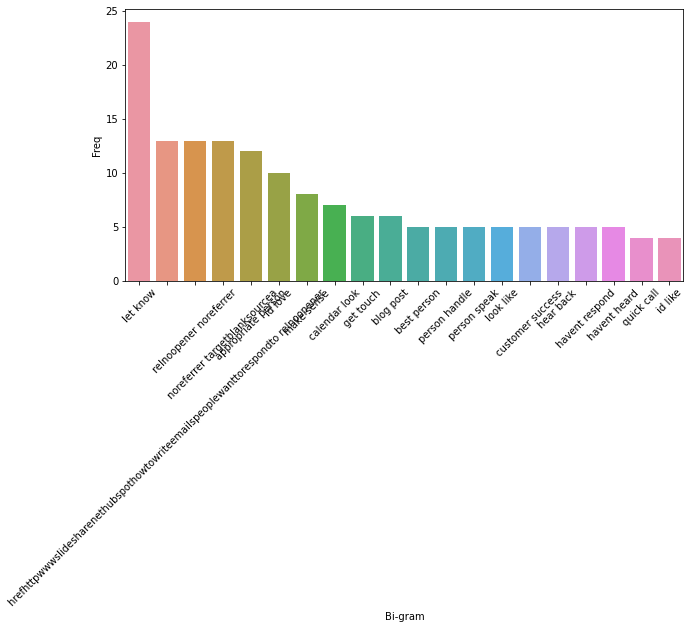

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

# Trigram analysis

In [58]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [59]:
top3_words = get_top_n3_words(df['lemmatized_text'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [60]:
top3_df

,Tri-gram,Freq
0,hrefhttpwwwslidesharenethubspothowtowriteemail...,13
1,relnoopener noreferrer targetblanksourcea,13
2,research determine need,4
3,could help point,4
4,make sense talk,4
...,...,...
195,nightly clean service,2
196,live chat support,2
197,automate lead generation,2
198,mike nick im,1


# trigram visualization

[Text(0, 0, 'hrefhttpwwwslidesharenethubspothowtowriteemailspeoplewanttorespondto relnoopener noreferrer'),
 Text(1, 0, 'relnoopener noreferrer targetblanksourcea'),
 Text(2, 0, 'research determine need'),
 Text(3, 0, 'could help point'),
 Text(4, 0, 'make sense talk'),
 Text(5, 0, 'sense talk let'),
 Text(6, 0, 'talk let know'),
 Text(7, 0, 'let know calendar'),
 Text(8, 0, 'know calendar look'),
 Text(9, 0, 'look appropriate person'),
 Text(10, 0, 'havent heard back'),
 Text(11, 0, 'question hrefhttpwwwslidesharenethubspothowtowriteemailspeoplewanttorespondto relnoopener'),
 Text(12, 0, 'show work available'),
 Text(13, 0, 'might get touch'),
 Text(14, 0, 'determine need could'),
 Text(15, 0, 'need could help'),
 Text(16, 0, 'help point best'),
 Text(17, 0, 'point best person'),
 Text(18, 0, 'best person brief'),
 Text(19, 0, 'person brief discussion')]

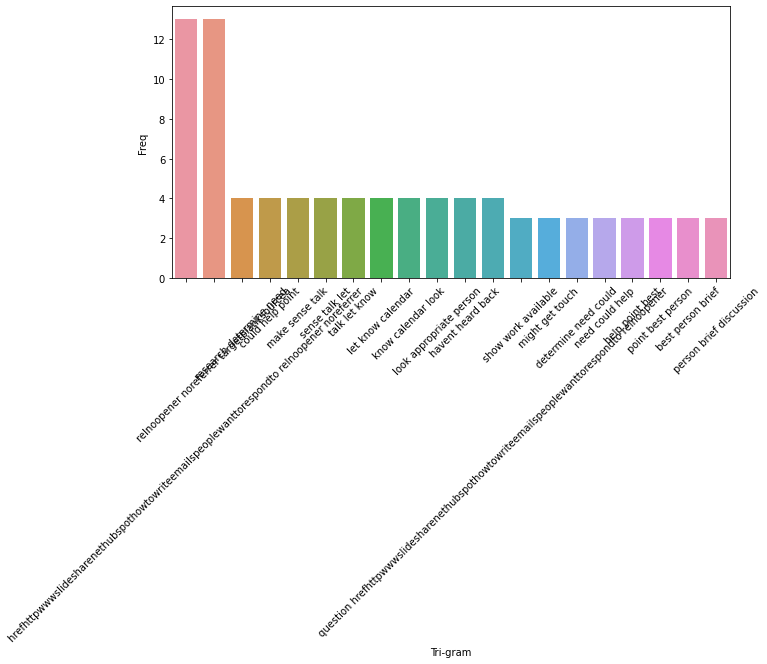

In [61]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# LABELING THE OUTPUT

# MODEL BUILDING

# Cosine Similarity 

In [62]:
df.new_template[0]

'hi name my name is name with your company we help specific company type with one liner i wanted to learn how you handle thing your company handles at company name and show you what were working on are you available for a brief call at time options'

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
countvectorizer = CountVectorizer(stop_words='english')
sparse_matrix = countvectorizer.fit_transform(df['new_template'])

In [65]:
sent = countvectorizer.transform(['hi helped a startup'])

In [66]:
df['similarity']= cosine_similarity(sparse_matrix,sent)

In [67]:
df[['similarity','new_template']].sort_values(by=['similarity'],ascending=False).head(10)

,similarity,new_template
64,0.612372,hi name we recently helped a startup by can ...
75,0.162221,hi name your websites design is absolutely bri...
45,0.136083,hi ryan i wanted to reach out one last time an...
2,0.130189,name id like to discuss your lead gen efforts ...
23,0.120386,name is the below of any interest to you hi na...
59,0.120386,hi name i didnt hear back from you last week w...
46,0.113228,hi ryan thanks for setting up your kissmetrics...
38,0.113228,hi name i know we havent been able to connect ...
6,0.113228,name we have a service that will help you wou...
42,0.109109,hi name i know youre busy just give me a or ...


In [68]:
data

,lemmatized_text,Template,Category
0,help specific type one liner want learn handle...,"<p>Hi {name},</p> <p>My name is {name} with {Y...",Cold Email Templates
1,mike nick im cofounder smart host help propert...,"<p>Hi Mike, <br/><br/>My name is Nick and I’m ...",Cold Email Templates
2,id like discuss lead gen effort help company c...,"<p>{name}, <br/><br/>I'd like to discuss your ...",Cold Email Templates
3,research determine need could help point best ...,"<p>{name}, <br/><br/>I am doing some research ...",Cold Email Templates
4,im hop help handle decision might get touch,"<p>{name}, <br/><br/>I’m hoping you can help m...",Cold Email Templates
...,...,...,...
71,notice hrefhttpwwwslidesharenethubspothowtowri...,"<p>I noticed you ... (<a href=""http://www.slid...",Opening Lines For Sales Emails
72,hello emnameem like cut printing cost percent ...,"<p>Hello <em>{name}</em>, </p> <p>How would y...",Sales Proposal Email Templates
73,thanks much loyal year show appreciation pleas...,"<p>Hi {name},</p> <p>Thanks so much for being ...",Discount Offer Email Templates
74,hello take quick look website immediately thor...,"<p>Hello {name},</p> <p>I took a quick look at...",Persuasive Sales Email Templates


# TFIDF VECTORIZER

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
vectorizer = TfidfVectorizer(analyzer='word',norm=None, use_idf=True,smooth_idf=True)
tfIdfMat  = vectorizer.fit_transform(df)

In [71]:
feature_names = sorted(vectorizer.get_feature_names())

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(df['lemmatized_text'])

TfidfVectorizer()

In [73]:
X = tfidf.transform(df['lemmatized_text'])
df['lemmatized_text'][1]

'mike nick im cofounder smart host help property manager optimize price marketplace like homeaway vrbo flipkey want learn currently handle price optimization show work available quick call tomorrow afternoon'

In [74]:
print([X[1, tfidf.vocabulary_['marketplace']]])

[0.18614010305955195]


In [75]:
print([X[1, tfidf.vocabulary_['optimization']]])

[0.1996711254099054]


In [76]:
print([X[1, tfidf.vocabulary_['homeaway']]]) # rarer word than the two 

[0.2187420302923069]


In [117]:
from sklearn.model_selection import train_test_split
X = df.new_template
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 57 entries with 0.00% negative, 0.00% positive


In [118]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [119]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
x = v.fit_transform(df['new_template'].values.astype('U'))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(class_weight='balanced')


Test result for 10000 features
accuracy score: 15.79%
Test result for 20000 features
accuracy score: 10.53%
Test result for 30000 features
accuracy score: 5.26%


In [120]:
df['Template'] = df['new_template'].factorize()[0]
from io import StringIO
category_id_df = df[['new_template', 'Template']].drop_duplicates().sort_values('Template')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Template', 'new_template']].values)

# Visualization 

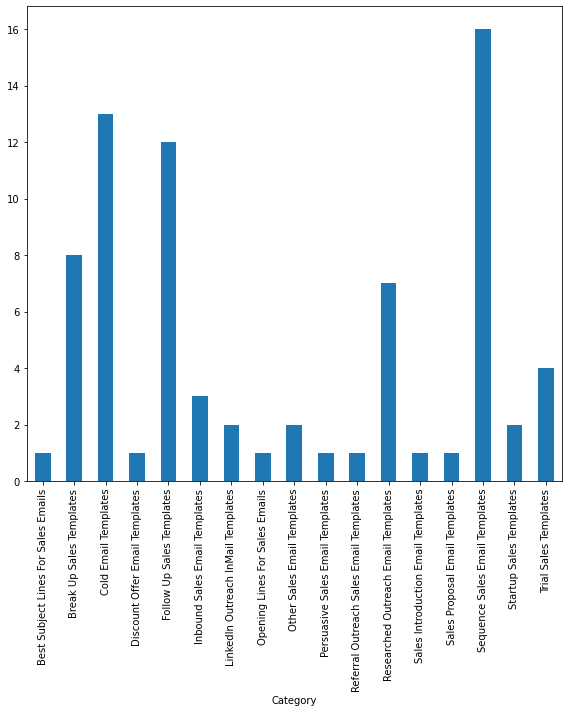

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,10))
df.groupby('Category').lemmatized_text.count().plot.bar(ylim=0)
plt.show()

# TF-IDF

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.lemmatized_text).toarray()
labels = df.new_template
features.shape


(76, 139)

# PERFORMING AND VISUALIZE NGRAM ANALYSIS ON EACH TEMPLATE

In [124]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Template, new_template in sorted(new_template.items()):
  features_chi2 = chi2(features, labels == new_template)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(new_template))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

AttributeError: 'str' object has no attribute 'items'

# SPLITING INTO TRAIN AND TEST

# FIT'S WITH CountVectorizer and TfidfTransformer

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Template'], df['new_template'],test_size=0.26, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform((X_train).values.astype('U'))
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = count_vect.fit_transform((X_test).values.astype('U'))
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

In [126]:
X_train.shape

(56,)

In [127]:
X_test.shape

(20,)

In [128]:
X_train_tfidf.shape

(56, 44)

In [129]:
X_test_tfidf.shape

(20, 18)

# USING MULTIPLE MODEL 

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [131]:
!pip install xgboost

In [132]:
X1=df['new_template']
Y1=df['Category']
x = df['new_template']
y = df['Category']
vect = CountVectorizer()

In [133]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.05,random_state=42)
x_train_dtm = vect.fit_transform((x_train1).values.astype('U'))
x_test_dtm = vect.transform((x_test1).values.astype('U'))


# Naive Bayes

In [134]:
NB = MultinomialNB()
NB.fit(x_train_dtm,y_train1)
y_predict = NB.predict(x_test_dtm)
NB_acc = metrics.accuracy_score(y_test1,y_predict)
NB_acc

0.75

# SGD Classifier

In [135]:
from sklearn.linear_model import LinearRegression 
lm = SGDClassifier()
lm.fit(x_train_dtm,y_train1)
lm_predict = lm.predict(x_test_dtm)
SGD_acc= metrics.accuracy_score(y_test1,lm_predict)
SGD_acc

0.5

# Random Classifier

In [136]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train1)
rf_predict = rf.predict(x_test_dtm)
Random_acc = metrics.accuracy_score(y_test1,rf_predict)
Random_acc

0.25

# XGBoost

In [137]:
xg = XGBClassifier()
xg.fit(x_train_dtm,y_train1)
xg_predict = xg.predict(x_test_dtm)
xg_acc = metrics.accuracy_score(y_test1,xg_predict)
xg_acc

[14:03:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5

# Passive Agressive Classifier

In [138]:
pg = PassiveAggressiveClassifier()
pg.fit(x_train_dtm,y_train1)
pg_predict = pg.predict(x_test_dtm)
pg_acc = metrics.accuracy_score(y_test1,pg_predict)
pg_acc

0.5

# Linear SVC

In [139]:
lv = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', tol=0.0001,
     verbose=0)
lv.fit(x_train_dtm,y_train1)
lv_predict = lv.predict(x_test_dtm)
lv_acc= metrics.accuracy_score(y_test1,lv_predict)
lv_acc

0.5

In [140]:
data = {'Model':['MultinomialNB','SGDClassifier','RandomForestClassifier','XGBClassifier', 'PassiveAggressiveClassifier','LinearSVC'],'Accuracy':[NB_acc, SGD_acc,Random_acc,xg_acc,pg_acc,lv_acc]}

# Accuracy score of each model

In [141]:
data_model = pd.DataFrame(data)
data_model.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
0,MultinomialNB,0.75
1,SGDClassifier,0.50
3,XGBClassifier,0.50
4,PassiveAggressiveClassifier,0.50
5,LinearSVC,0.50
2,RandomForestClassifier,0.25


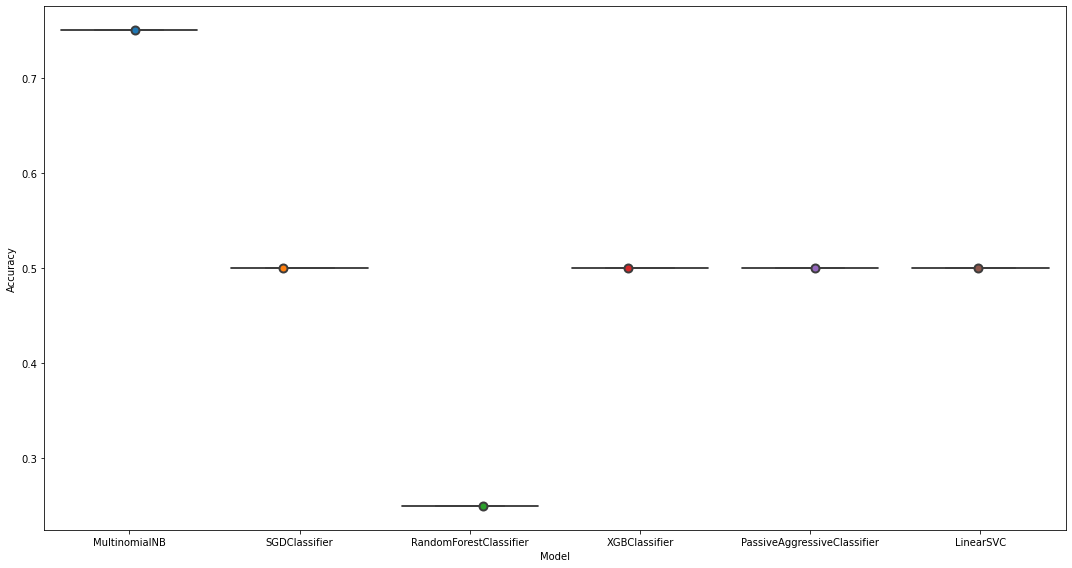

In [142]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='Model', y='Accuracy', data=data_model)
sns.stripplot(x='Model', y='Accuracy', data=data_model, 
              size=8, jitter=True, edgecolor="gray", linewidth=2,)
plt.show()

<AxesSubplot:xlabel='Model'>

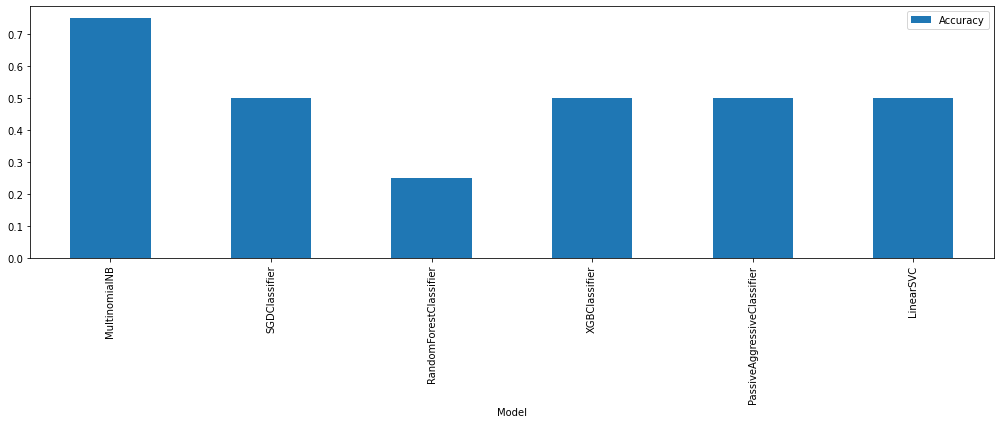

In [143]:
data_model.plot(x="Model", y="Accuracy", kind="bar")

# FINALIZE THE MODEL USING PassiveAggressiveClassifier

In [146]:
X_COUNT = count_vect.fit_transform(X1)
X_TFIDF = tfidf_transformer.fit_transform(X_COUNT)

In [147]:
modelf=PassiveAggressiveClassifier().fit(X_TFIDF, Y1)

# SAMPLE PREDICTION OF FINAL MODEL

In [148]:
print(modelf.predict(count_vect.transform(["appoinment schedule"])))

['Trial Sales Templates']


In [149]:
print(modelf.predict(count_vect.transform(["hi my name is nick i want your shoes"])))

['Cold Email Templates']


In [150]:
print(modelf.predict(count_vect.transform(["job search"])))

['Sales Introduction Email Templates']


# Saving the model in the pickle file

In [151]:
import pickle

In [152]:
modelf=PassiveAggressiveClassifier().fit(X_TFIDF, Y1)

    # Save the vectorizer
vec_file = 'vectorizer.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

    # Save the model
mod_file = 'classification.model'
pickle.dump(modelf, open(mod_file, 'wb'))

# our model works good with Multinomial Classifier